<a href="https://colab.research.google.com/github/vishalkandukuri97/AI-ML-Projects/blob/main/CreditCard_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
creditcard=pd.read_csv('/content/creditcard 2.csv')

df=pd.read_csv('/content/creditcard 2.csv')

creditcard.tail()

creditcard.shape

creditcard.info()

creditcard.describe()

creditcard.columns
missing = df.isna().sum().sort_values(ascending=False)
print("\nMissing Values:\n", missing)

print("\nDuplicate rows:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235720 entries, 0 to 235719
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    235720 non-null  float64
 1   V1      235720 non-null  float64
 2   V2      235720 non-null  float64
 3   V3      235720 non-null  float64
 4   V4      235720 non-null  float64
 5   V5      235720 non-null  float64
 6   V6      235720 non-null  float64
 7   V7      235720 non-null  float64
 8   V8      235720 non-null  float64
 9   V9      235720 non-null  float64
 10  V10     235720 non-null  float64
 11  V11     235720 non-null  float64
 12  V12     235720 non-null  float64
 13  V13     235720 non-null  float64
 14  V14     235720 non-null  float64
 15  V15     235720 non-null  float64
 16  V16     235720 non-null  float64
 17  V17     235720 non-null  float64
 18  V18     235720 non-null  float64
 19  V19     235720 non-null  float64
 20  V20     235720 non-null  float64
 21  V21     23

In [9]:
# 5) Separate numeric & categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# Optional: Extract brand from creditcardv1
if "creditcardv1" in df.columns:
    df["v1"] = (
        df["creditcardv1"]
        .astype(str)
        .str.strip()
        .str.split(" ")
        .str[0]
        .str.lower()
        .str.replace("-", "", regex=False)
        .str.replace(".", "", regex=False)
    )
    if "v1" not in categorical_cols:
        categorical_cols.append("v1")




Numeric columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Categorical columns: []


In [10]:
# 6) Descriptive statistics for numeric columns
print("\nNumeric Descriptive Statistics:\n", df[numeric_cols].describe().T)




Numeric Descriptive Statistics:
            count          mean           std        min           25%  \
Time    249556.0  85202.024131  42704.597318   0.000000  50249.000000   
V1      249556.0     -0.037792      1.960424 -56.407510     -0.936476   
V2      249556.0     -0.020189      1.670365 -72.715728     -0.608861   
V3      249556.0      0.102598      1.507248 -33.680984     -0.714127   
V4      249556.0      0.024774      1.415129  -5.683171     -0.837250   
V5      249556.0     -0.037964      1.376288 -42.147898     -0.728237   
V6      249556.0      0.018971      1.326704 -26.160506     -0.747768   
V7      249556.0     -0.016577      1.227456 -43.557242     -0.565266   
V8      249556.0      0.002013      1.195251 -73.216718     -0.201545   
V9      249556.0      0.001185      1.112322 -13.434066     -0.655010   
V10     249556.0     -0.000856      1.087489 -24.588262     -0.526596   
V11     249556.0      0.041966      1.029323  -4.797473     -0.718920   
V12     249556.0 

In [11]:
# 7) Categorical summaries
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


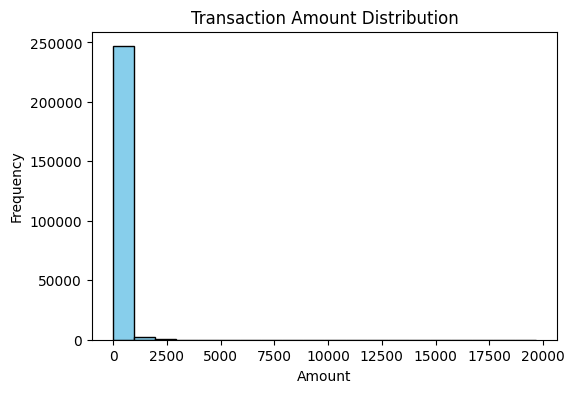

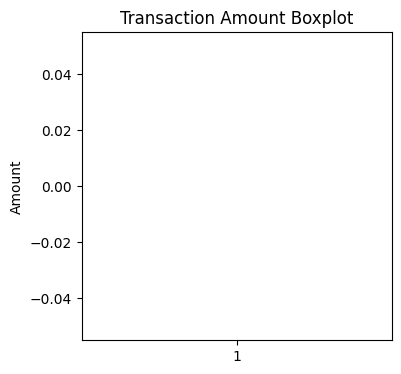

In [12]:
# 8) Amount Distribution
if "Amount" in df.columns:
    # Histogram
    plt.figure(figsize=(6,4))
    plt.hist(df["Amount"], bins=20, color='skyblue', edgecolor='black')
    plt.title("Transaction Amount Distribution")
    plt.xlabel("Amount")
    plt.ylabel("Frequency")
    plt.show()

    # Boxplot
    plt.figure(figsize=(4,4))
    plt.boxplot(df["Amount"], vert=True)
    plt.title("Transaction Amount Boxplot")
    plt.ylabel("Amount")
    plt.show()


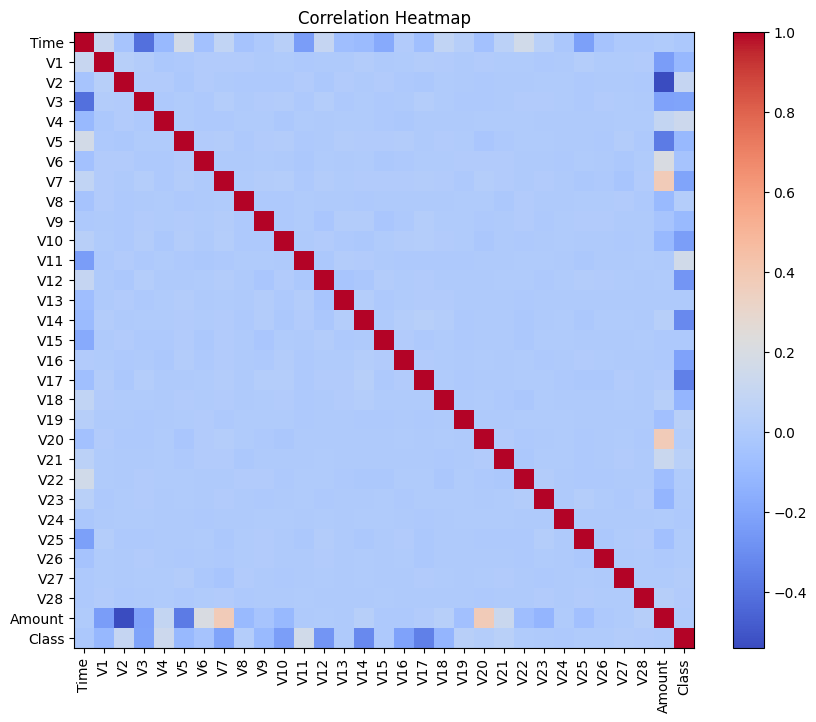


Correlation with Amount:
 Amount    1.000000
V7        0.378195
V20       0.377024
V6        0.202484
V21       0.121567
V4        0.095208
V18       0.033750
V14       0.032976
V28       0.028210
V17       0.011138
Class     0.005970
Time      0.004096
V27       0.003248
V12       0.001637
V24       0.001489
V13       0.000844
V11      -0.003836
V26      -0.007076
V16      -0.007789
V15      -0.010655
V9       -0.039387
V19      -0.059516
V25      -0.060427
V22      -0.074523
V8       -0.098735
V10      -0.105674
V23      -0.120067
V3       -0.213094
V1       -0.233734
V5       -0.368721
V2       -0.540393
Name: Amount, dtype: float64


In [13]:
# 9) Correlation heatmap
if "Amount" in df.columns:
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(10,8))
    plt.imshow(corr, cmap='coolwarm', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title("Correlation Heatmap")
    plt.show()

    # Correlation with Amount
    corr_amount = corr["Amount"].sort_values(ascending=False)
    print("\nCorrelation with Amount:\n", corr_amount)